In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mnso
from wordcloud import WordCloud,STOPWORDS
from pandas.plotting import scatter_matrix
from datetime import datetime
import squarify
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [101]:
# loading datasets
SouthAfricaCrimeStats_df = pd.read_csv("SouthAfricaCrimeStats_v2.csv")
ProvincePopulation_df = pd.read_csv("ProvincePopulation.csv")
SouthAfricaCrimeStats_df['Total 2005-2016'] = SouthAfricaCrimeStats_df.sum(axis=1)
# making province as index  
SouthAfricaCrimeStats_df.set_index('Province')
ProvincePopulation_df.set_index('Province')

SouthAfricaCrimeStats_df.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889


In [41]:
# joining crime stats with province stats
df_outer = pd.merge(SouthAfricaCrimeStats_df, ProvincePopulation_df, on='Province', how='left')
df_outer.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187,12272263,18178,675.1
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776,2745590,129825,21.1
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889,12272263,18178,675.1


In [43]:
df_outer.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187,12272263,18178,675.1
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776,2745590,129825,21.1
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889,12272263,18178,675.1


<AxesSubplot:>

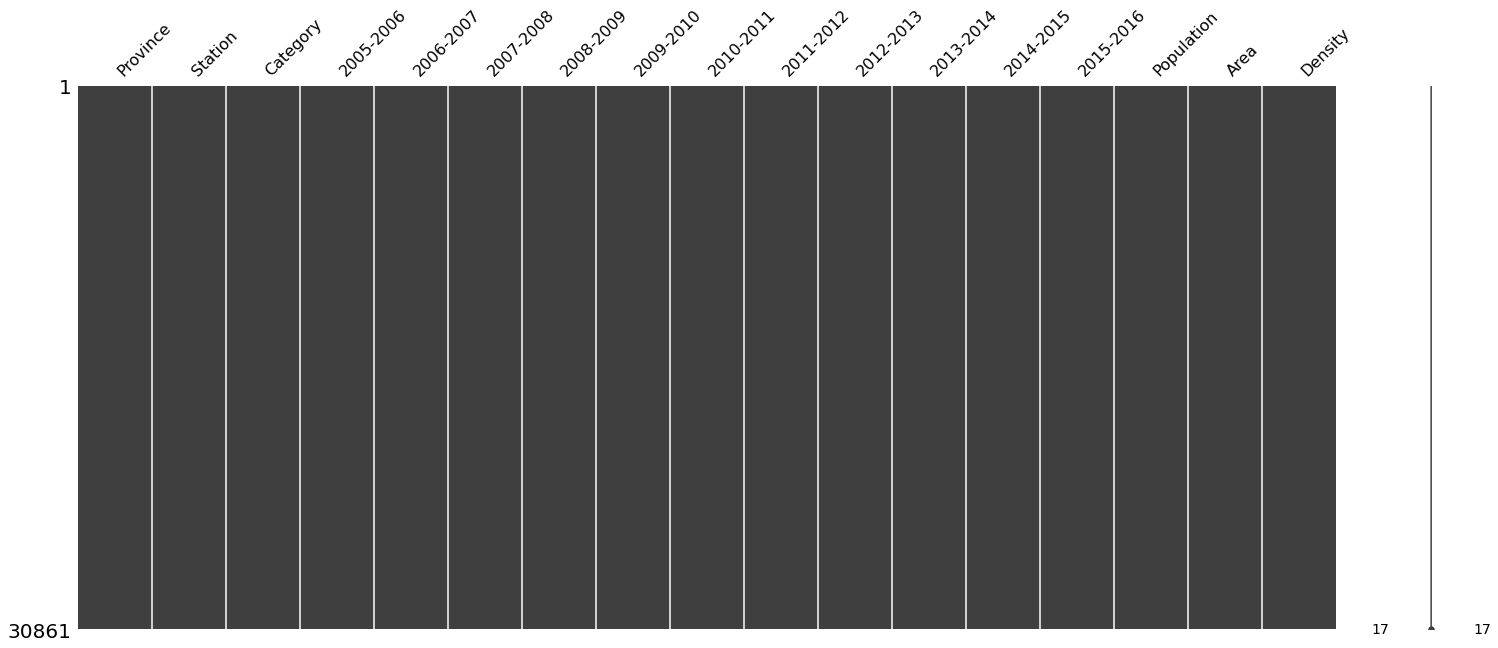

In [4]:
mnso.matrix(df_outer)

In [49]:
# Group Crime Counts by Province
crimes_by_province = df_outer.groupby(['Province'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]
# Group Crime Counts by Category
crimes_by_category = df_outer.groupby(['Category'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]
# Group Crime Counts by Station
crimes_by_station = df_outer.groupby(['Station'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]

In [55]:
#Add counts, Reset Index & Sort by Total Crimes Between 2005-2016
province_totals = crimes_by_province.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
category_totals = crimes_by_category.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
station_totals = crimes_by_station.sum().reset_index().sort_values('Total 2005-2016',ascending=False)


,Station,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016
654,Mitchells Plain,23599,26131,27453,28296,27853,26722,27367,26948,24264,20366,278498
145,Cape Town Central,19773,18817,17429,15805,16458,16454,16979,18158,18186,17886,193730
427,Jhb Central,22179,20768,19141,20154,18625,17306,15382,13949,14393,15734,192238
231,Durban Central,19174,20677,16293,17476,16791,14989,15762,16245,16202,15080,182836
373,Hillbrow,17172,15757,16557,16195,13857,14192,12392,10716,10814,11008,149593
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Vorstershoop,9,10,32,16,15,10,24,15,19,17,178
91,Boetsap,14,18,14,11,23,18,6,7,14,18,159
631,Mbizeni,15,11,11,13,16,12,9,12,10,5,120
667,Mokopong,3,10,12,9,7,13,9,12,9,8,100


In [96]:
# Create Total Stations by Province Dataframe
total_province_stations = pd.DataFrame(df_outer['Province'].value_counts()).reset_index()
total_province_stations['Total Stations'] = total_province_stations['Province']
total_province_stations.drop('Province',axis=1,inplace=True)
total_province_stations['Province'] = total_province_stations['index']
total_province_stations.drop('index',axis=1,inplace=True)
total_province_stations


,Total Stations,Province
0,5292,Eastern Cape
1,5022,Kwazulu/Natal
2,4050,Western Cape
3,3861,Gauteng
4,2970,Free State
5,2673,Limpopo
6,2457,Northern Cape
7,2322,Mpumalanga
8,2214,North West


In [69]:
# Set Index To Province (To add totals)
province_totals.set_index('Province',inplace=True)
total_province_stations.set_index('Province',inplace=True)
ProvincePopulation_df.set_index('Province',inplace=True)

# Add Totals to province_totals Dataframe
province_totals['Total Stations'] = total_province_stations['Total Stations']
province_totals['Population'] = ProvincePopulation_df['Population']
province_totals['Area'] = ProvincePopulation_df['Area']
province_totals['Density'] = ProvincePopulation_df['Density']

# Reset index back
province_totals = province_totals.reset_index()
total_province_stations = total_province_stations.reset_index()
population_stats = ProvincePopulation_df.reset_index()

Text(0.5, 0, 'South African Provinces')

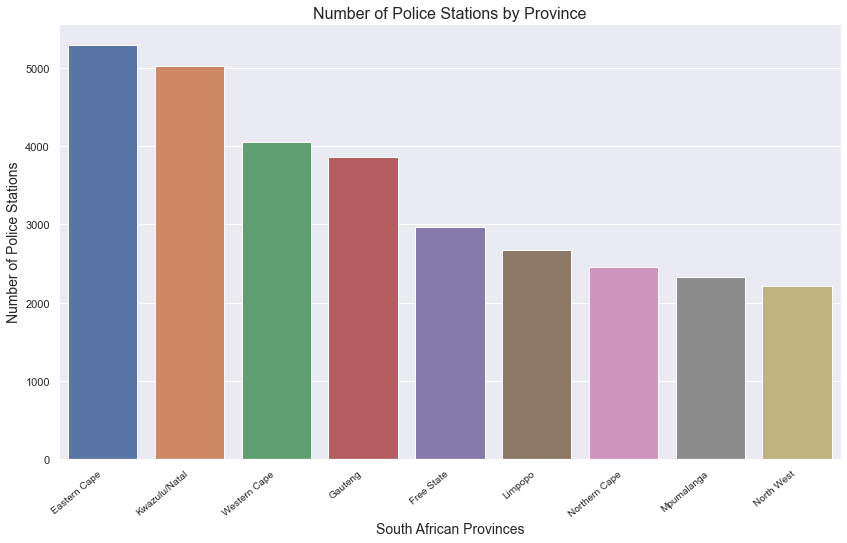

In [82]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=total_province_stations,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)


Text(0.5, 0, 'South African Provinces')

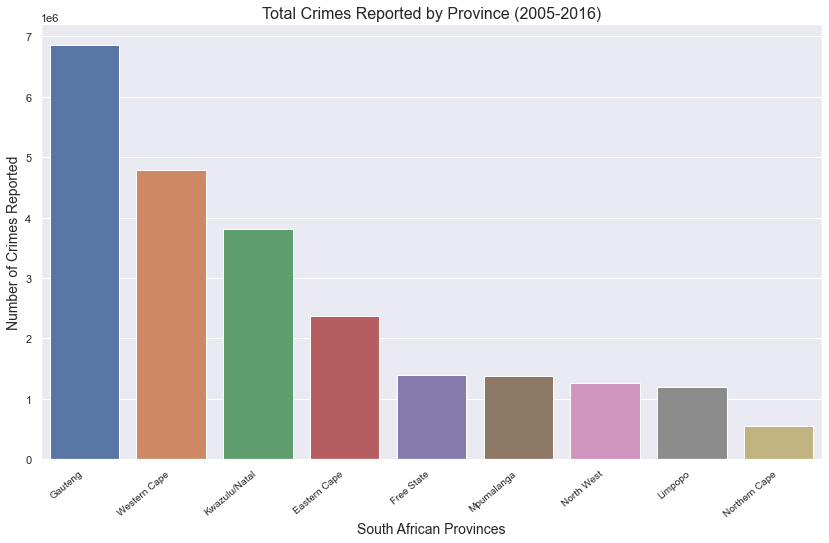

In [71]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=province_totals,x='Province',y='Total 2005-2016')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'Number of Crimes Reported')

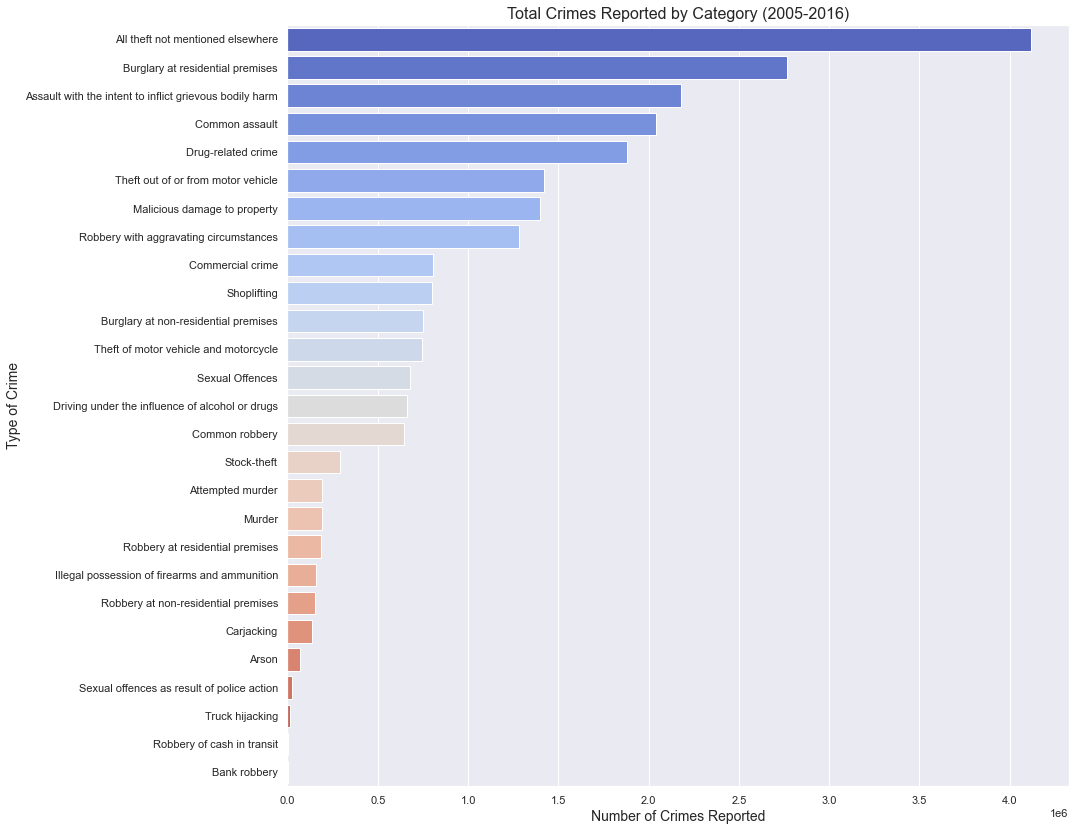

In [76]:
# Plot Figure
plt.figure(figsize=(14,14)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=category_totals,y='Category',x='Total 2005-2016',palette='coolwarm')
ax.set_title('Total Crimes Reported by Category (2005-2016)',fontsize=16)
ax.set_ylabel('Type of Crime',fontsize=14)
ax.set_xlabel('Number of Crimes Reported',fontsize=14)

Text(0.5, 0, 'South African Police Stations')

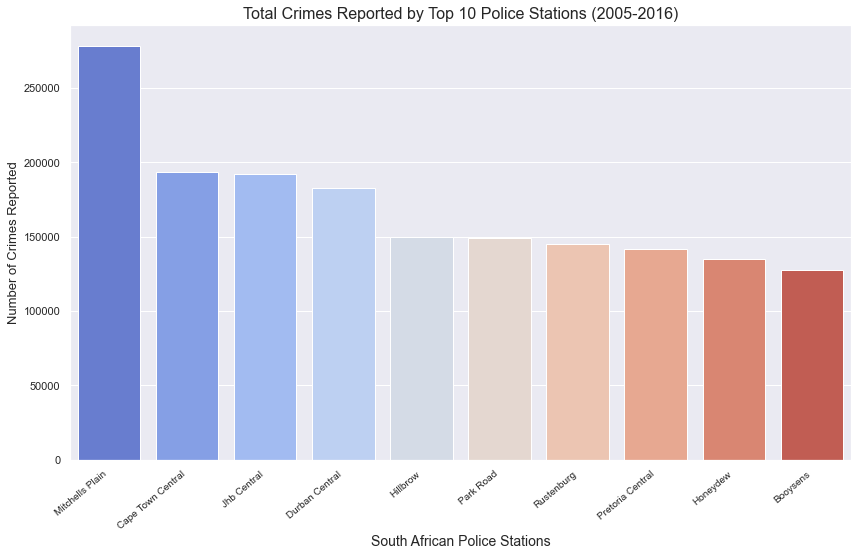

In [94]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.head(10),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Top 10 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

Text(0.5, 0, 'South African Police Stations')

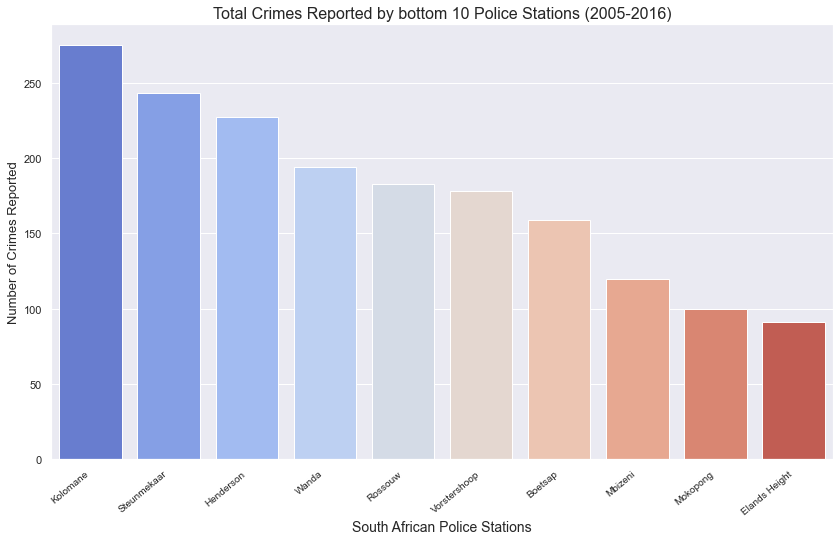

In [95]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.tail(10),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by bottom 10 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

In [75]:
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016,Total Stations,Population,Area,Density
2005-2006,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.98,0.98,0.98,0.99,0.57,0.89,-0.57,0.86
2006-2007,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.99,0.99,1.00,0.57,0.88,-0.57,0.84
2007-2008,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.57,0.83
2008-2009,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.56,0.88,-0.57,0.84
2009-2010,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.56,0.82
2010-2011,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.58,0.86,-0.56,0.80
2011-2012,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.60,0.86,-0.55,0.76
2012-2013,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.59,0.85,-0.55,0.74
2013-2014,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.57,0.85,-0.54,0.78
2014-2015,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.55,0.83,-0.54,0.77


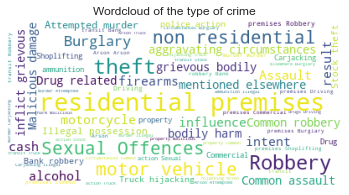

In [87]:
def wordcloud_by_province(province):
    df_new = df_outer[df_outer.Province == province]
    stopwords = set(STOPWORDS)
    stopwords.add("Total")
    stopwords.add("Crime")
    stopwords.add("Crimes")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 0).generate(" ".join([i for i in df_new['Category']]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of the type of crime")

wordcloud_by_province('Gauteng')   

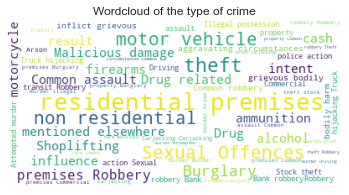

In [97]:
wordcloud_by_province('Western Cape')

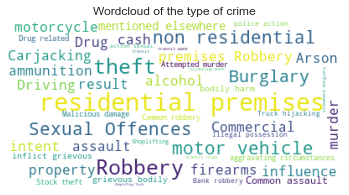

In [109]:
wordcloud_by_province('North West')

In [99]:
SouthAfricaCrimeStats_df.describe()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016
count,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000
mean,70.527753,69.301610,67.154305,68.756165,69.517773,67.766696,68.259616,69.700658,71.416999,71.498202,70.736496,764.636272
std,205.491698,198.037635,186.760510,187.173860,185.514638,181.865878,183.334468,184.812420,187.635207,185.019046,179.363964,1986.723913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
50%,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,11.000000,11.000000,11.000000,119.000000
75%,49.000000,50.000000,50.000000,52.000000,54.000000,52.000000,53.000000,55.000000,56.000000,57.000000,58.000000,608.000000
max,6692.000000,6341.000000,6316.000000,6803.000000,6571.000000,6260.000000,6108.000000,6310.000000,6044.000000,5335.000000,5176.000000,61631.000000


In [130]:
df_outer.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187,12272263,18178,675.1
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776,2745590,129825,21.1
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889,12272263,18178,675.1


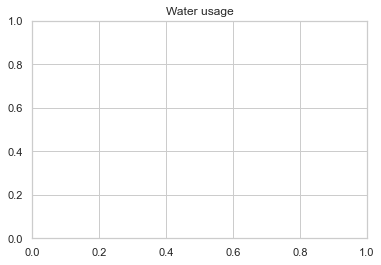

In [135]:
import plotly.express as px
fig = px.treemap(df_outer, 
                 path=['Station'], 
                 values='Total 2005-2016',
                 color='Total 2005-2016'
                )
plt.title('Water usage')
fig.show()